alpha: 0.1 beta: 0.9
Optimal x: [3.00467120e-06 9.21476535e-07]
Minimum value: -22.86992791969189
Iteraion times: 36


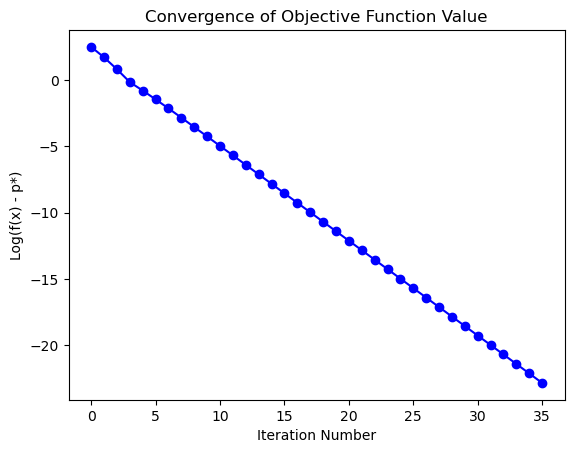

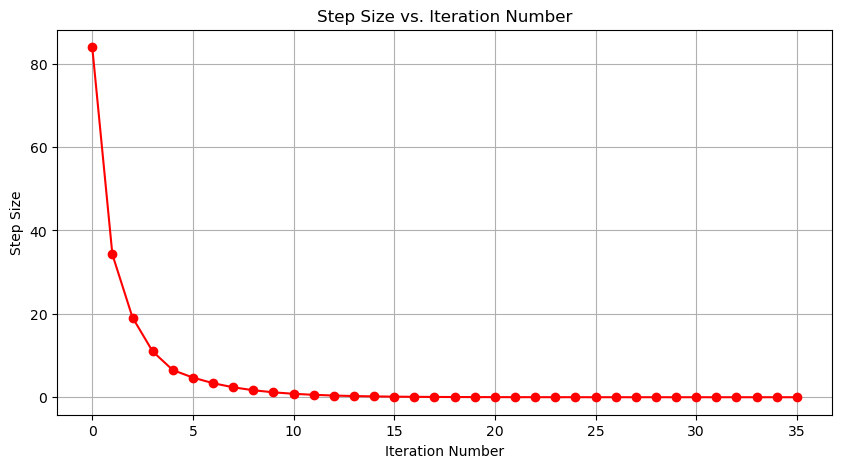

alpha: 0.1 beta: 0.7
Optimal x: [3.70444481e-06 1.13608403e-06]
Minimum value: -22.45120638566692
Iteraion times: 14


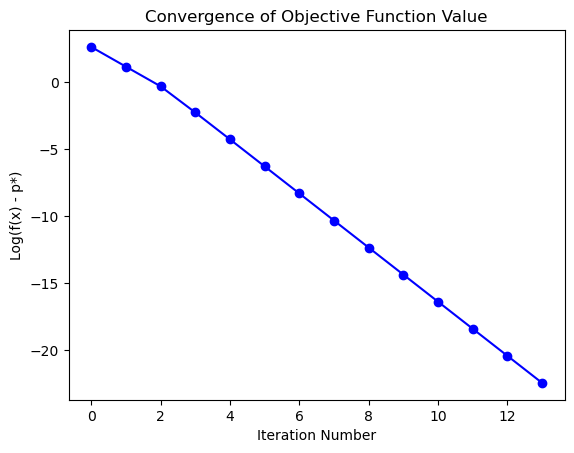

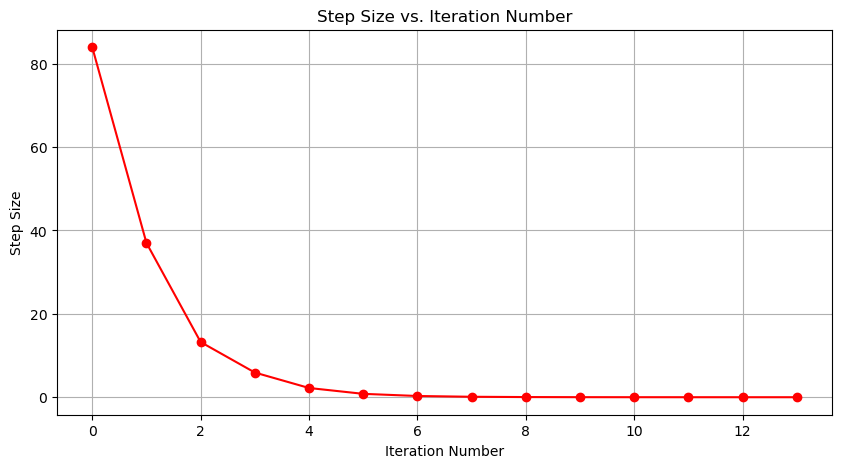

alpha: 0.1 beta: 0.5
Optimal x: [-2.63783144e-06 -8.08973622e-07]
Minimum value: -23.130333438648254
Iteraion times: 16


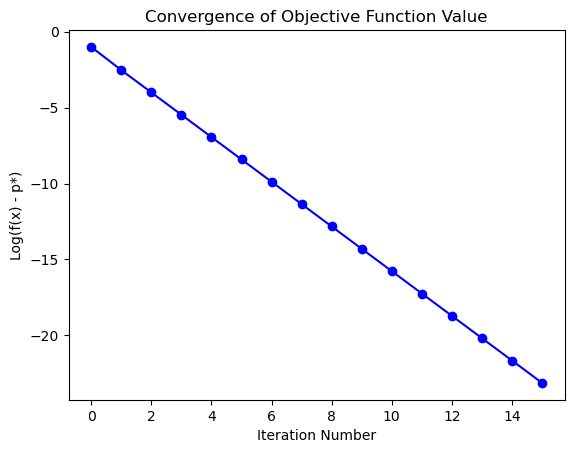

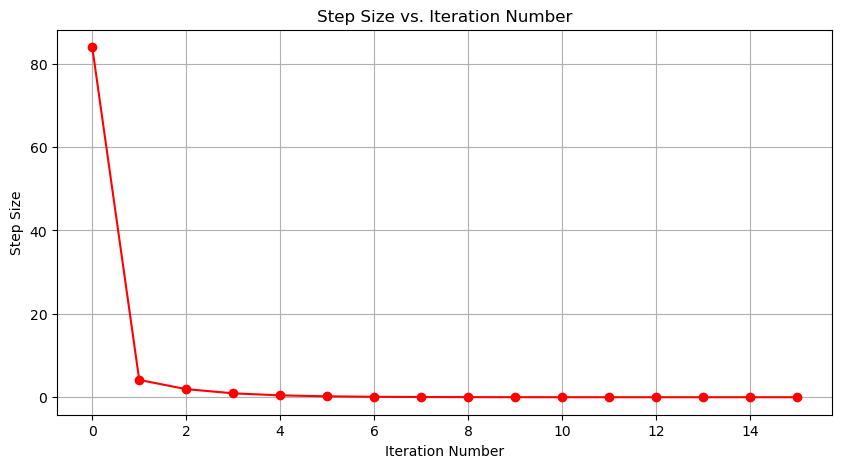

alpha: 0.1 beta: 0.3
Optimal x: [6.00562310e-07 4.83187411e-06]
Minimum value: -22.20738379861294
Iteraion times: 19


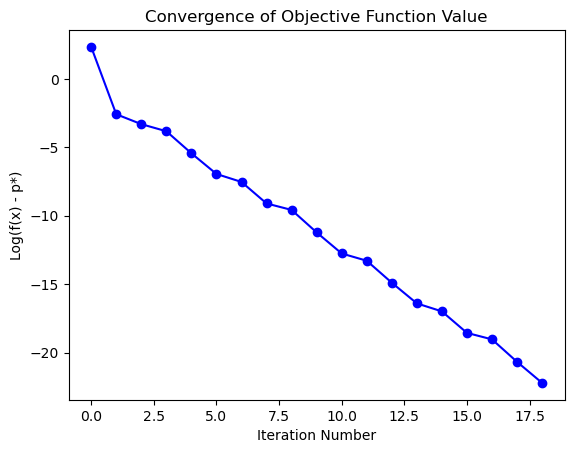

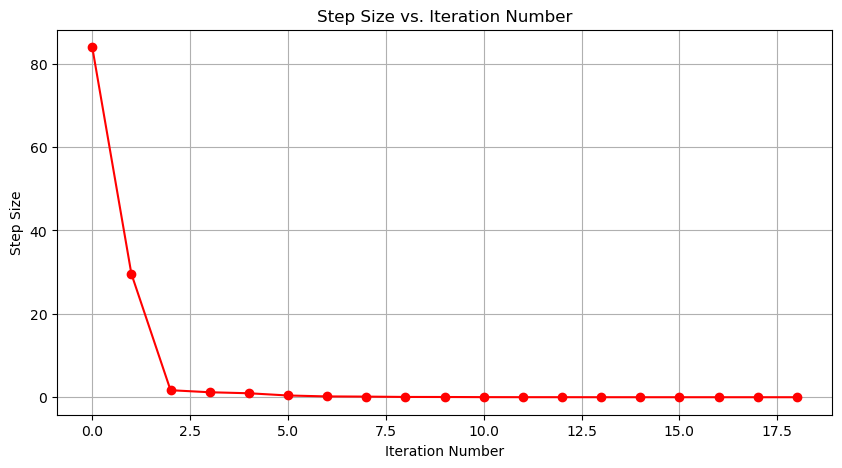

alpha: 0.1 beta: 0.1
Optimal x: [-9.90570952e-07  4.58729700e-06]
Minimum value: -22.3277068456969
Iteraion times: 53


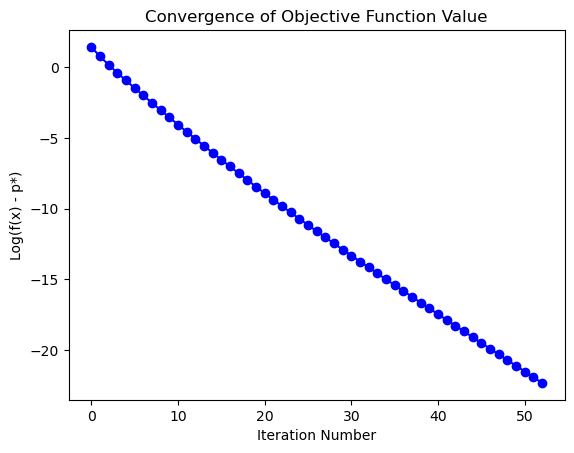

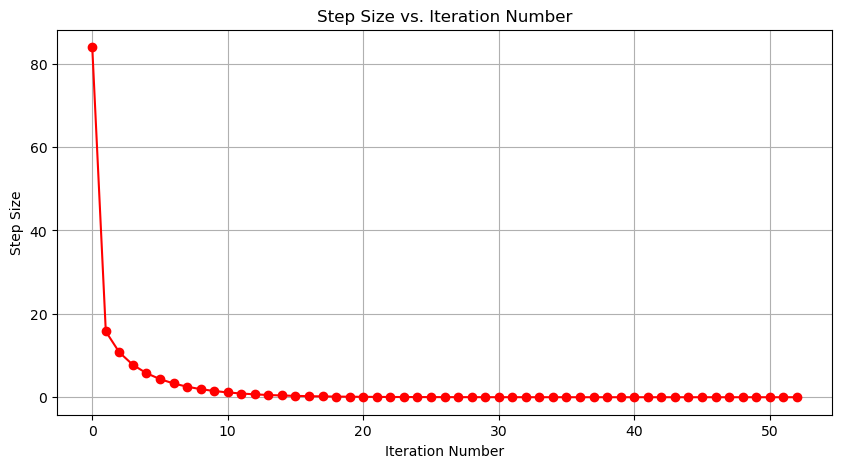

alpha: 0.05 beta: 0.9
Optimal x: [3.88812518e-06 1.19241537e-06]
Minimum value: -22.35443194110321
Iteraion times: 98


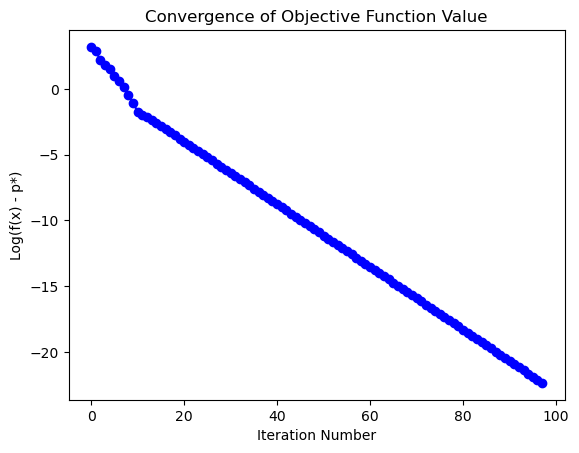

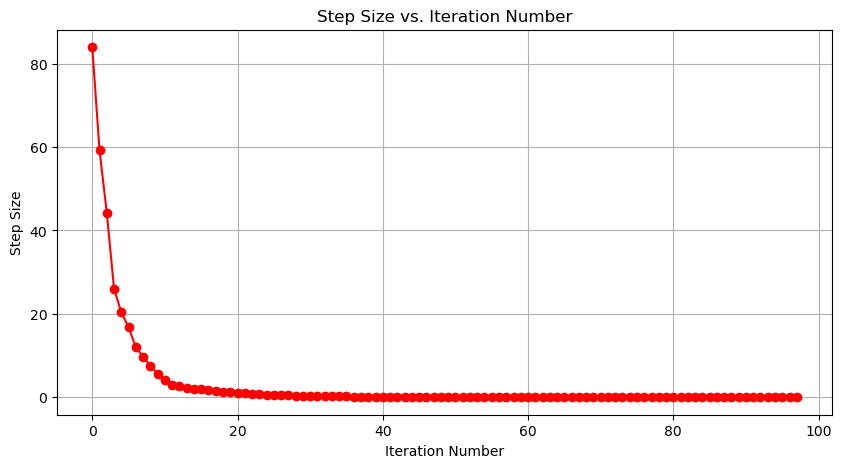

alpha: 0.05 beta: 0.7
Optimal x: [3.70444481e-06 1.13608403e-06]
Minimum value: -22.45120638566692
Iteraion times: 14


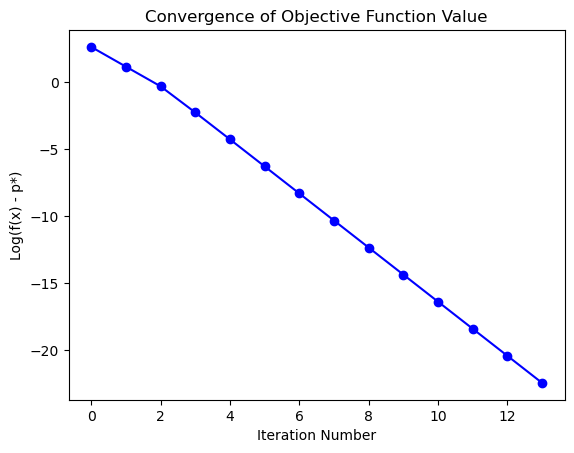

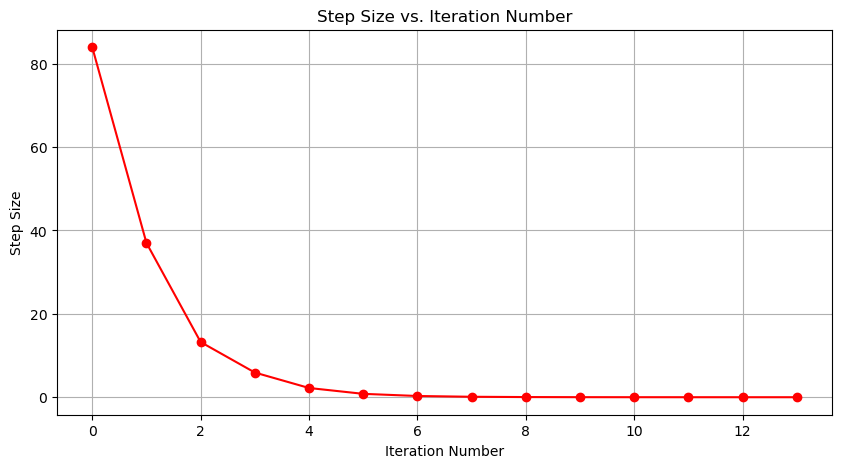

alpha: 0.05 beta: 0.5
Optimal x: [-2.29817458e-06 -7.04807221e-07]
Minimum value: -23.406058101159527
Iteraion times: 21


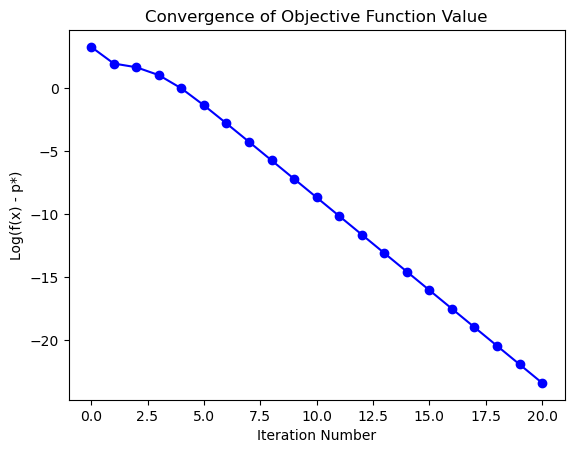

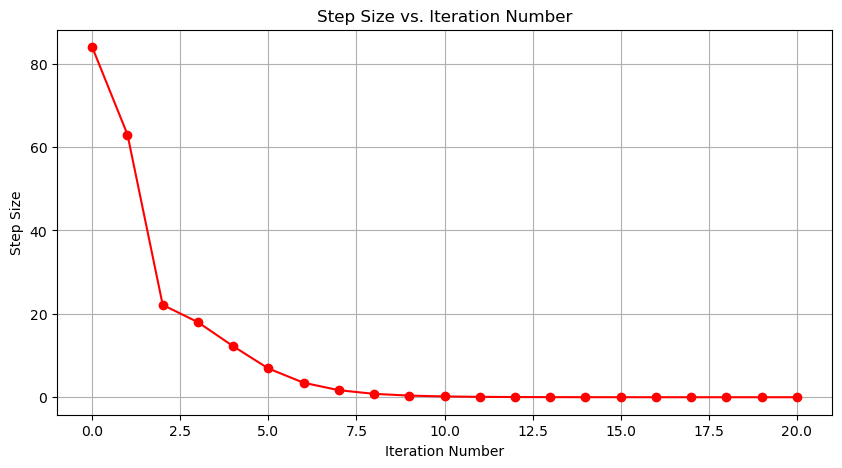

alpha: 0.05 beta: 0.3
Optimal x: [-1.32202401e-06 -3.38860982e-06]
Minimum value: -22.730365566111605
Iteraion times: 20


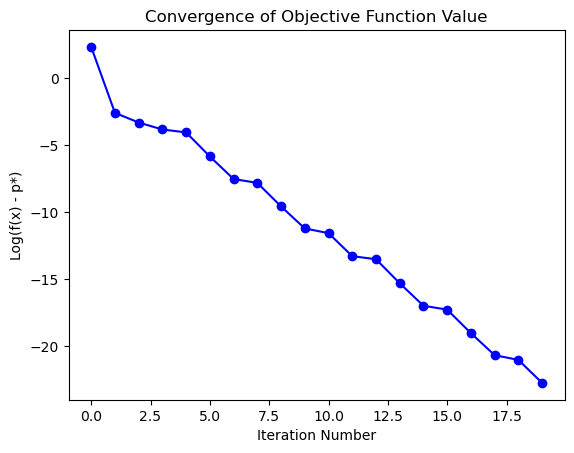

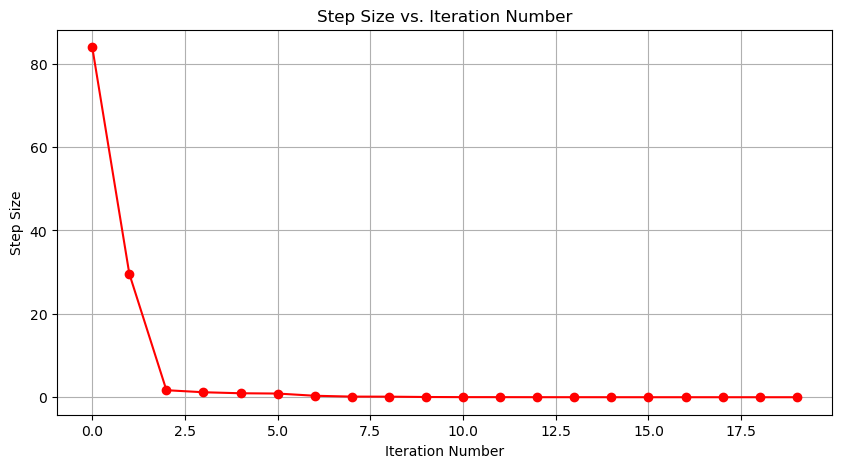

alpha: 0.05 beta: 0.1
Optimal x: [-5.30540985e-07 -4.21379382e-06]
Minimum value: -22.480406281040946
Iteraion times: 54


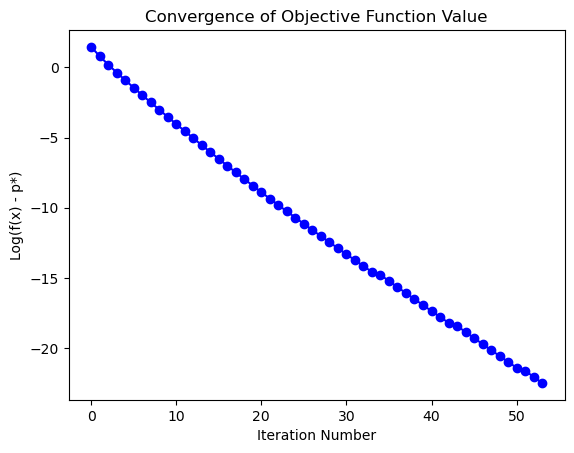

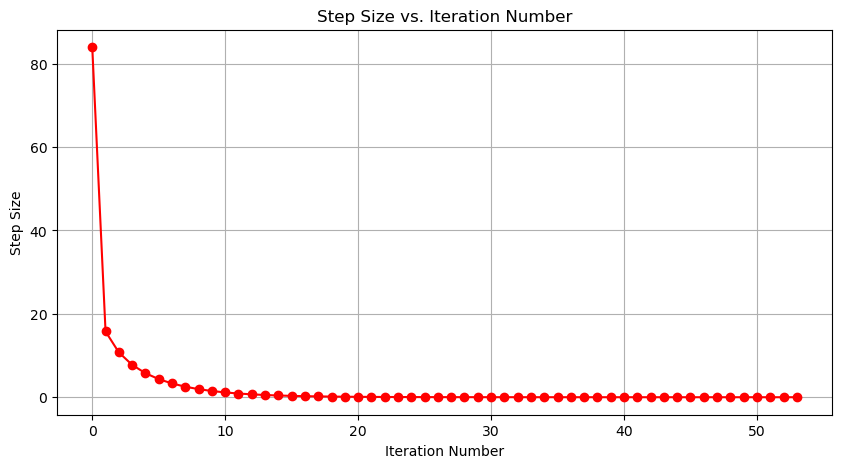

alpha: 0.01 beta: 0.9
Optimal x: [-3.81821892e-06 -1.17097643e-06]
Minimum value: -22.390718232833414
Iteraion times: 113


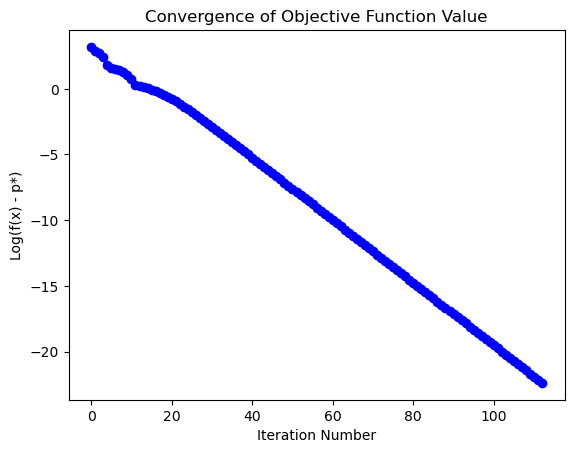

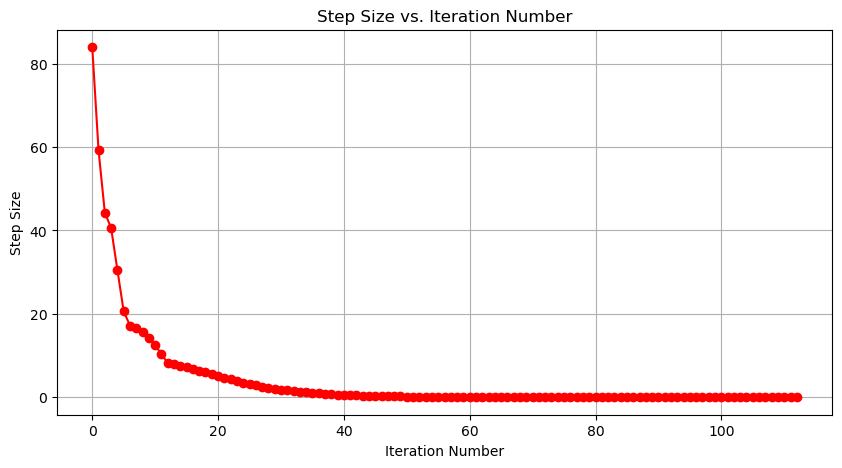

alpha: 0.01 beta: 0.7
Optimal x: [3.92315060e-06 1.20315701e-06]
Minimum value: -22.33651231365884
Iteraion times: 198


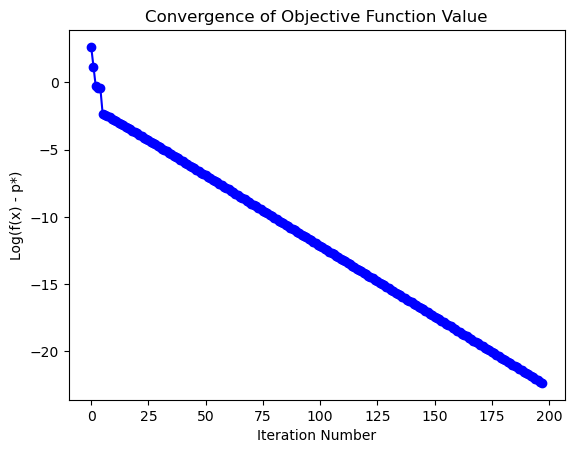

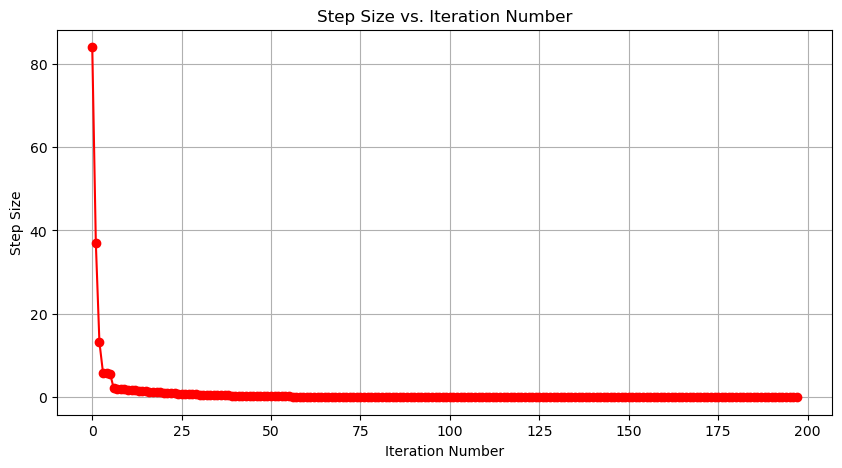

alpha: 0.01 beta: 0.5
Optimal x: [-2.29817458e-06 -7.04807221e-07]
Minimum value: -23.406058101159527
Iteraion times: 21


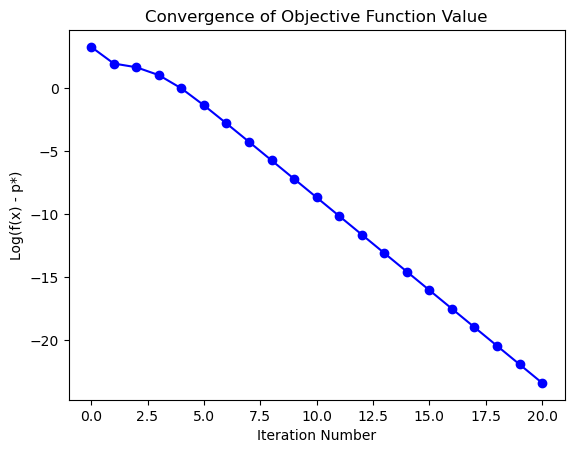

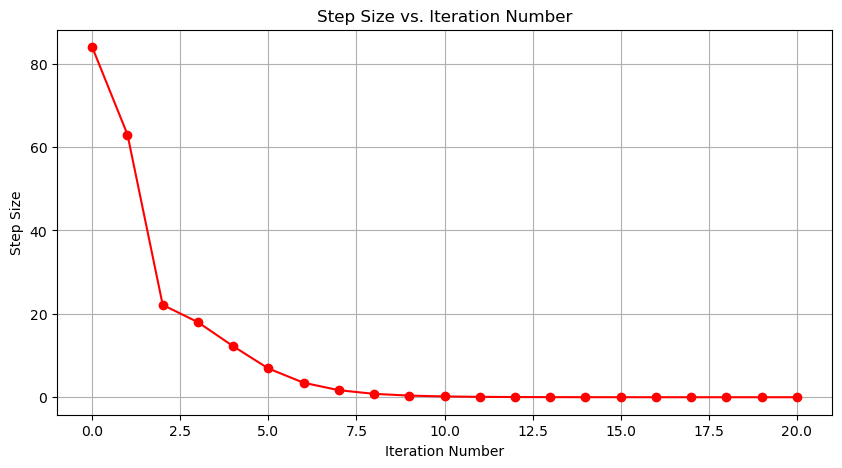

alpha: 0.01 beta: 0.3
Optimal x: [1.90450733e-06 2.49179876e-06]
Minimum value: -22.955202597932146
Iteraion times: 21


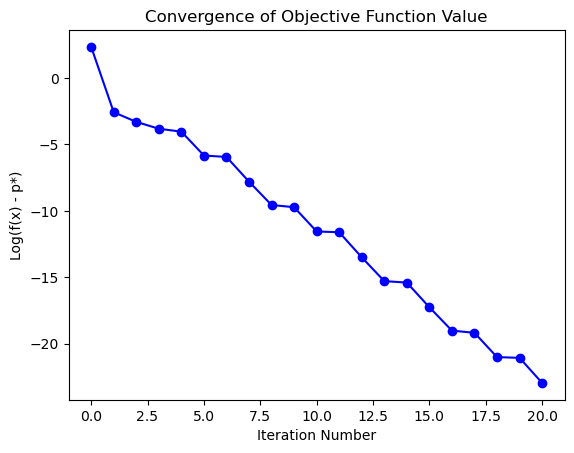

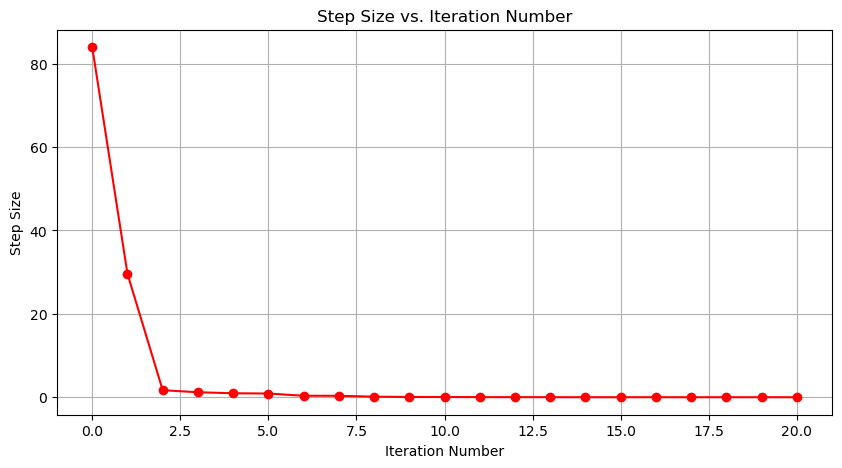

alpha: 0.01 beta: 0.1
Optimal x: [1.34407683e-06 3.73943352e-06]
Minimum value: -22.56052105967352
Iteraion times: 55


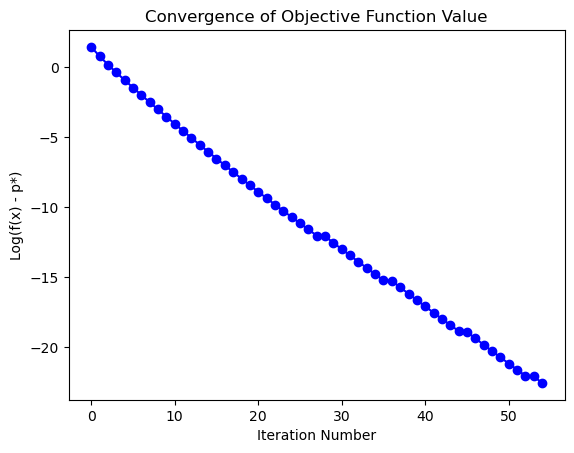

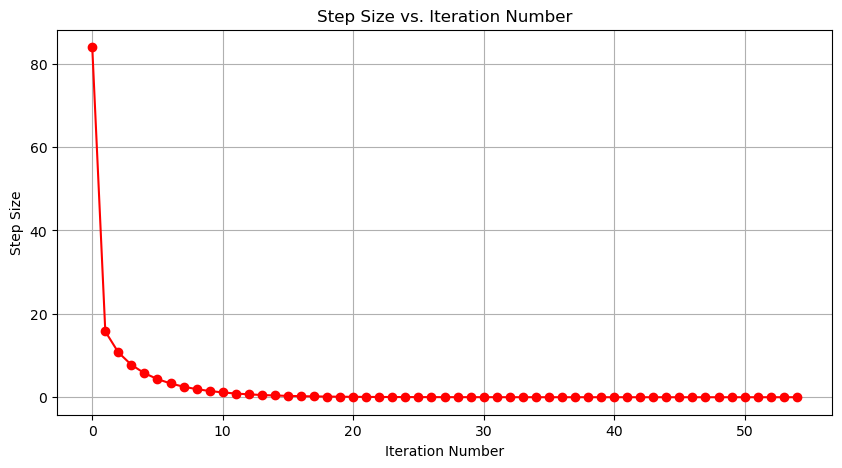

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, a):
    return np.sum(np.exp(np.dot(a, x)) + np.exp(-np.dot(a, x)))

def grad_f(x, a):
    exp_term = np.exp(np.dot(a, x))
    return np.dot(a.T, exp_term) - np.dot(a.T, 1/exp_term)

def backtrack_line_search(x, a, alpha, beta, eta):
    """
    回溯线搜索算法
    """
    t = 1.0
    while f(x - t * grad_f(x, a), a) > f(x, a) - alpha * t * np.linalg.norm(grad_f(x, a))**2:
        t *= beta
    return t

def gradient_descent(a, alpha, beta, eta, max_iter=1000):
    """
    梯度下降算法
    """
    x = np.ones(len(a[0]))  # 初始化 x
    f_values = []  # 用于记录每次迭代后的 f(x)
    norms = []  # 用于记录每次迭代后的梯度范数

    for it in range(max_iter):
        grad = grad_f(x, a)
        if np.linalg.norm(grad) <= eta:
            break  # 检查停止准则

        step_size = backtrack_line_search(x, a, alpha, beta, eta)
        x = x - step_size * grad
        f_values.append(f(x, a))
        norms.append(np.linalg.norm(grad))

    return x, f_values, norms, it

np.random.seed(0)  # 确保结果可复现
# 设置参数
m = 10  # 向量个数
n = 2  # 向量维度
alphas = [0.1, 0.05, 0.01]  # \( \alpha \) 参数列表
betas = [0.9,0.7,0.5,0.3,0.1]  # \( \beta \) 参数列表
eta = 1e-4  

a = np.random.randn(m, n)
p_star = f(np.zeros(n), a) 

for alpha in alphas:
    for beta in betas:
        print("alpha:", alpha, "beta:", beta)
        x_opt, f_values, norms,iter = gradient_descent(a, alpha, beta, eta)
        print("Optimal x:", x_opt)
        print("Minimum value:", np.log(f_values[-1] - p_star))
        print("Iteraion times:",iter)
        print("===============================================")

        # 绘制 log(f(x) - p*)
        plt.plot(range(len(f_values)), [np.log(fv - p_star) for fv in f_values], marker='o', linestyle='-', color='b')
        plt.xlabel('Iteration Number')
        plt.ylabel('Log(f(x) - p*)')
        plt.title('Convergence of Objective Function Value')
        plt.show()

        # 绘制步长与迭代次数的关系
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(norms)), norms, marker='o', linestyle='-', color='r')
        plt.xlabel('Iteration Number')
        plt.ylabel('Step Size')
        plt.title('Step Size vs. Iteration Number')
        plt.grid(True)
        plt.show()


当 α 和 β 变小时，算法可能会需要更多的迭代次数来达到收敛，因为每一步的步长都变得更小，算法需要更多的步骤来逐渐接近最小值。过小的步长可能会导致收敛速度过慢，甚至可能陷入局部最小值或在最优解附近震荡。

在 \( \l_\infty \)-范数下找到最陡下降方向，意味着在给定点 \( x \) 处寻找一个单位向量 \( d \)，以便在该方向上目标函数 \( f(x) \) 的变化率最大。这等同于在点 \( x \) 处找到梯度的绝对值最大的方向。数学上，\( \l_\infty \)-范数定义为向量中绝对值最大的分量的绝对值，因此最陡下降方向即为梯度绝对值最大的方向。

以下是使用 \( \l_\infty \)-范数确定最陡下降方向的伪代码

### 伪代码：找到 \( \l_\infty \)-范数下最陡下降方向

1. **初始化**：设定初始点 \( x \) 并定义目标函数 \( f(x) \)。
2. **梯度计算**：在点 \( x \) 处计算目标函数 \( f(x) \) 的梯度 \( \nabla f(x) \)。
3. **绝对值最大化**：计算梯度 \( \nabla f(x) \) 的绝对值，并找到绝对值最大的分量的索引 \( j \)。
4. **构造方向向量**：创建最陡下降方向向量 \( d \)，其中第 \( j \) 个分量为 -1（如果梯度分量为负）或 1（如果梯度分量为正），其余分量均为 0。
5. **返回结果**：输出最陡下降方向向量 \( d \)。


最陡下降方向的伪代码：

```plaintext
Function STEEPEST_DESCENT_DIRECTION(x):
    Gradient g = GRADIENT_OF_FUNCTION_AT(x)
    Let j be the index corresponding to the maximum absolute value in g
    Let d be a vector of zeros
    Set d[j] = -1 if g[j] < 0 else 1
    Return d
```



[0. 0.] [57.30883724964916, 56.33792522451849, 55.39986204438226, 54.493615917918746, 52.77262381269621, 51.16738284201784, 49.67083965795308, 48.27641998413675, 46.92543746800688, 45.63685020113068, 44.40251951876177, 43.2043778275693, 42.06276006408602, 40.96943926972824, 39.908643667438525, 38.89918943208723, 37.93014360287558, 36.993051237600724, 36.10273508611512, 35.24328807708147, 34.4179058105337, 33.63744086954176, 32.87257380532191, 32.14838083371626, 31.455817417664868, 30.78618161598764, 30.157731113320644, 29.539129262707533, 28.956276799046233, 28.39856018097321, 27.86199217579325, 27.356631675226428, 26.863557775833407, 26.40230439698016, 25.95413961834684, 25.532632121163044, 24.755148106183128, 24.029937922885146, 23.401271940798154, 22.809864766214034, 22.30921358967506, 21.839894274751455, 21.450881378651495, 21.094462103177353, 20.80451555327694, 20.554052233878124, 20.353928498222793, 20.204507208496434, 20.087942000947617, 20.036527685473366, 20.0] [65.41783152568

C:\Users\Wyc333\AppData\Local\Temp\ipykernel_43868\329231570.py:71: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(len(f_values)), [np.log(fv - p_star) for fv in f_values], marker='o', linestyle='-', color='b')


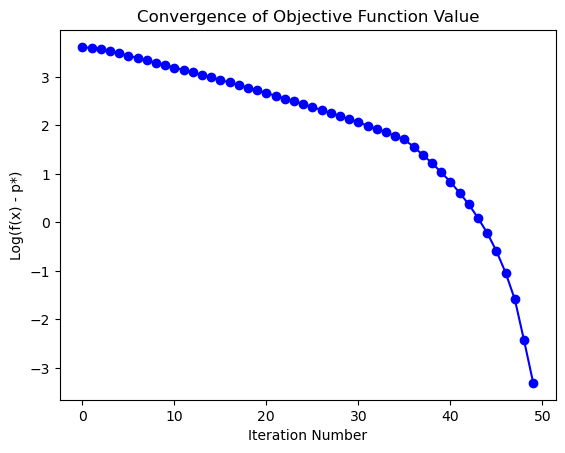

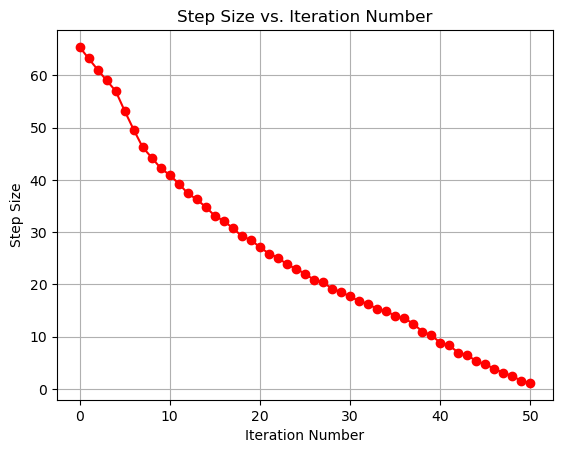

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def steepest_descent_direction(x, a):
    """
    计算在 x 处的最陡下降方向
    """
    grad = grad_f(x, a)
    j = np.argmax(np.abs(grad))
    d = np.zeros_like(grad)
    d[j] = -1 if grad[j] < 0 else 1
    return d
def backtrack_line_search_sd(x, a, alpha, beta, eta, d):
    """
    回溯线搜索算法
    """
    t = 1.0
    while f(x - t * grad_f(x, a), a) > f(x, a) - alpha * t * np.linalg.norm(grad_f(x, a))**2:
        t *= beta
    return t
def steepest_descent(a, alpha, beta, eta, max_iter=1000):
    """
    最陡下降算法
    """
    x = np.ones(len(a[0]))  # 初始化 x
    f_values = []  # 用于记录每次迭代后的 f(x)
    norms = []  # 用于记录每次迭代后的梯度范数

    for _ in range(max_iter):
        grad = grad_f(x, a)
        if np.linalg.norm(grad, ord=np.inf) <= eta:
            break  # 检查停止准则

        direction = steepest_descent_direction(x, a)
        # print(direction)
        step_size = backtrack_line_search_sd(x, a, alpha, beta, eta, direction)
        x = x - step_size * direction
        f_values.append(f(x, a))
        norms.append(np.linalg.norm(grad, ord=np.inf))

    return x, f_values, norms


def f(x, a):
    return np.sum(np.exp(np.dot(a, x)) + np.exp(-np.dot(a, x)))

def grad_f(x, a):
    exp_term = np.exp(np.dot(a, x))
    return np.dot(a.T, exp_term) - np.dot(a.T, 1/exp_term)



np.random.seed(0)  # 确保结果可复现
# 设置参数
m = 10  # 向量个数
n = 2  # 向量维度
eta = 1e-4  

a = np.random.randn(m, n)
p_star = f(np.zeros(n), a) 

alpha = 0.1  # 回溯参数
beta = 0.5  # 回溯参数



x_opt, f_values, norms = steepest_descent(a, alpha, beta, eta)


print(x_opt, f_values, norms)
# 绘制 log(f(x) - p*)
plt.plot(range(len(f_values)), [np.log(fv - p_star) for fv in f_values], marker='o', linestyle='-', color='b')
plt.xlabel('Iteration Number')
plt.ylabel('Log(f(x) - p*)')
plt.title('Convergence of Objective Function Value')
plt.show()

# 绘制步长与迭代次数的关系
# plt.figure(figsize=(10, 5))
plt.plot(range(len(norms)), norms, marker='o', linestyle='-', color='r')
plt.xlabel('Iteration Number')
plt.ylabel('Step Size')
plt.title('Step Size vs. Iteration Number')
plt.grid(True)
plt.show()
